# Medical Cost EDA

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
sns.set_style("whitegrid")

## Load the data

In [74]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocessing

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int

In [76]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [77]:
data["sex"]=data["sex"].map({"male":1,"female":0})

In [78]:
data["smoker"]=data["smoker"].map({"yes":1,"no":0})

In [79]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int

In [81]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Detecting Outliers

In [88]:
## Code for Detecting Outlier
def detect_outliers(df, n, features_list):
    outlier_indices = []
    for feature in features_list:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

In [83]:
data.iloc[detect_outliers(data,1,["age","bmi","children","charges"])]

,age,sex,bmi,children,smoker,region,charges
543,54,0,47.41,0,1,southeast,63770.42801
860,37,0,47.60,2,1,southwest,46113.51100
1047,22,1,52.58,1,1,southeast,44501.39820


,age,sex,bmi,children,smoker,region,charges
543,54,0,47.41,0,1,southeast,63770.42801
860,37,0,47.60,2,1,southwest,46113.51100
1047,22,1,52.58,1,1,southeast,44501.39820


In [84]:
data.drop(detect_outliers(data,1,["age","bmi","children","charges"]),inplace=True)

The outlier was only present in BMI

In [89]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


## Exploratory Data Analysis

In [104]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.210487,0.505618,30.621749,1.095131,0.202996,13184.598991
std,14.051892,0.500156,6.040236,1.206218,0.402380,11980.121452
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.255000,0.000000,0.000000,4729.002375
50%,39.000000,1.000000,30.360000,1.000000,0.000000,9361.326800
75%,51.000000,1.000000,34.600000,2.000000,0.000000,16516.743675
max,64.000000,1.000000,53.130000,5.000000,1.000000,62592.873090


### Univariate Analysis

1. Age

<AxesSubplot:xlabel='age', ylabel='Count'>

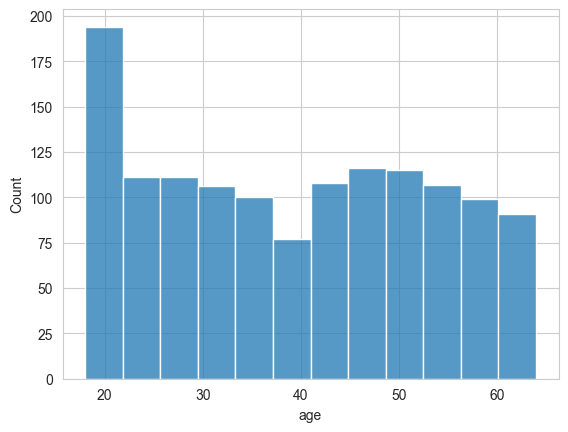

In [90]:
sns.histplot(data=data,x="age")

2. Smoker

In [95]:
data["smoker"].value_counts()

0    1064
1     271
Name: smoker, dtype: int64

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

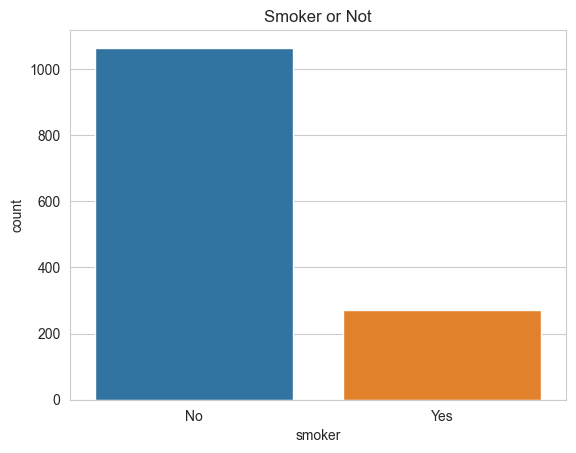

In [96]:
ax=sns.countplot(x=data["smoker"])
plt.title("Smoker or Not")
ax.set_xticklabels(["No","Yes"])

Most of the people are not smokers

3. BMI

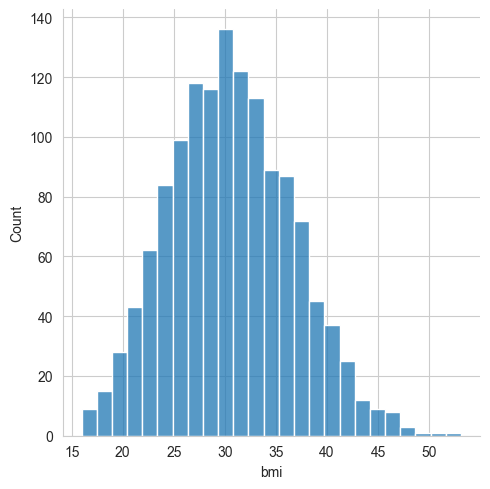

In [97]:
sns.displot(x=data["bmi"])

Wow
Perfect normal distribution

4. Charges

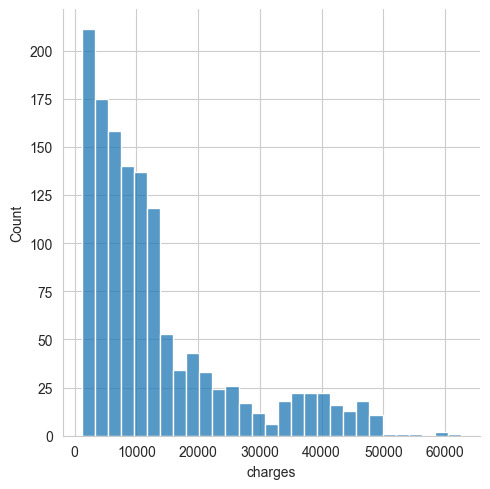

In [98]:
sns.displot(x=data["charges"])

It seems most of the bills are below 20000

### Bivariate Analysis

In [99]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [101]:
data.groupby("region").agg({"charges":"mean"})

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14517.729108
southwest,12242.719557


Prices per Person are almost same across the region

In [102]:
data.groupby("sex").agg({"charges":"mean"})

,charges
sex,
0,12441.177660
1,13911.499849


Males have slightly larger charges around 1.5k than females

In [105]:
data.groupby("children").agg({"charges":"mean"})

,charges
children,
0,12276.264515
1,12632.811998
2,14943.689478
3,15355.318367
4,13850.656311
5,8786.035247


<AxesSubplot:xlabel='children', ylabel='charges'>

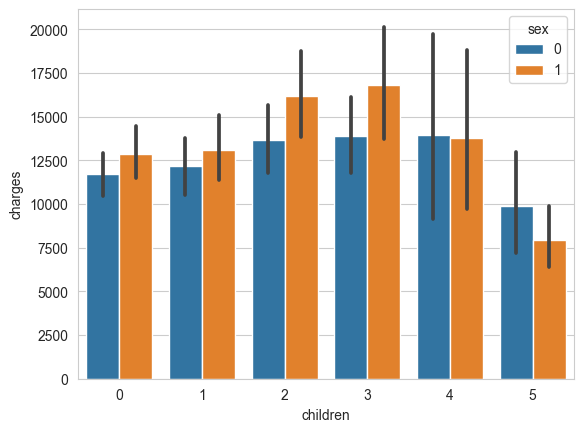

In [107]:
sns.barplot(x=data["children"],y=data["charges"],hue=data["sex"])

People with 5 children seems to be very healthy and their charges are low

In [110]:
data.groupby(["smoker","sex"]).agg({"charges":"mean"})

charges
smoker sex              
0      0     8762.297300
       1     8087.204731
1      0    30249.563122
       1    32969.478176

It seems most of the charges for non smokers are way less

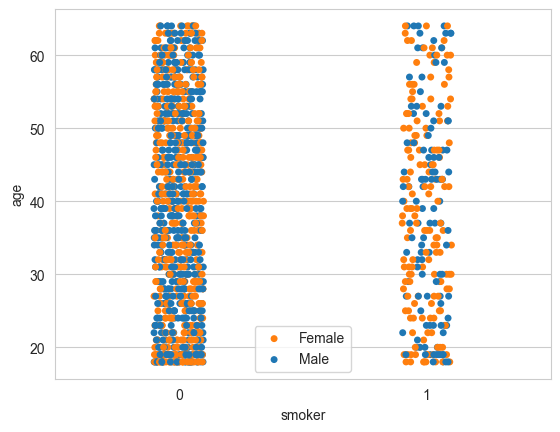

In [124]:
ax=sns.stripplot(x=data["smoker"],y=data["age"],hue=data["sex"])
ax.legend(["Female","Male"])


<AxesSubplot:xlabel='smoker', ylabel='age'>

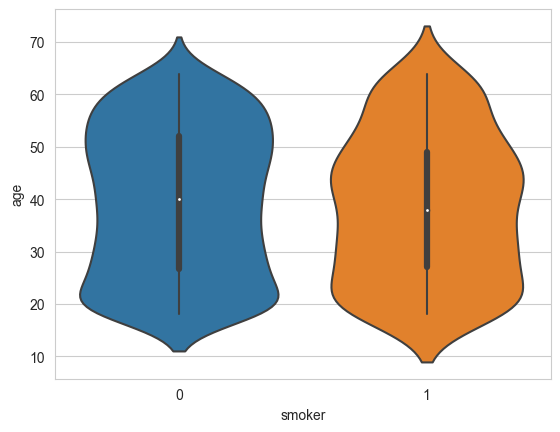

In [120]:
sns.violinplot(x=data["smoker"],y=data["age"])

In [125]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


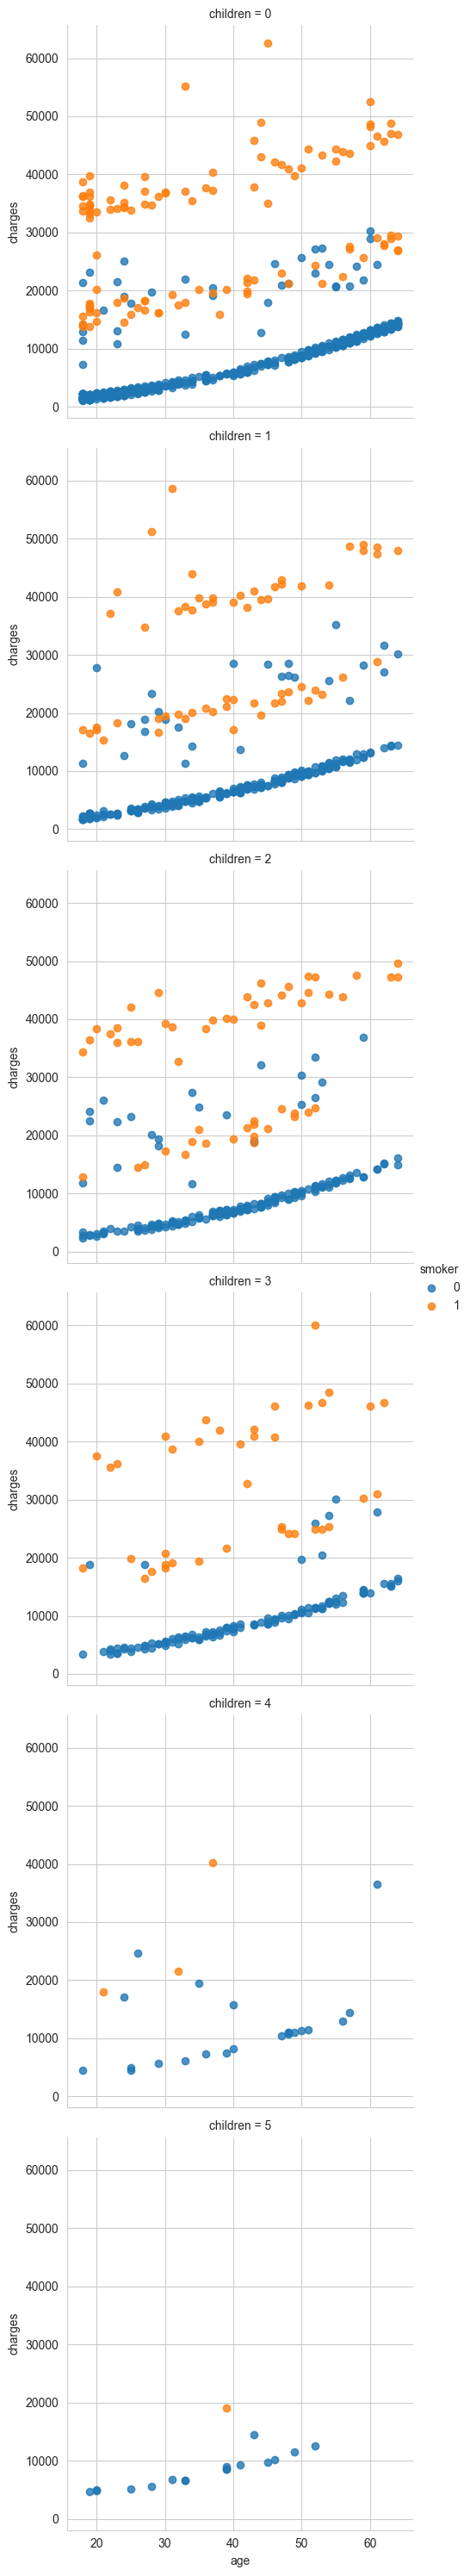

In [153]:
ax=sns.lmplot(data=data,x="age",y="charges",hue="smoker",fit_reg=False,row="children")

## Conclusion
* Ratio of men > Ratio of female
* Charges for non-smoker are way less than smokers
* People with more than 5 children have lowest cost